In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
digits.images.shape

(1797, 8, 8)

In [5]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


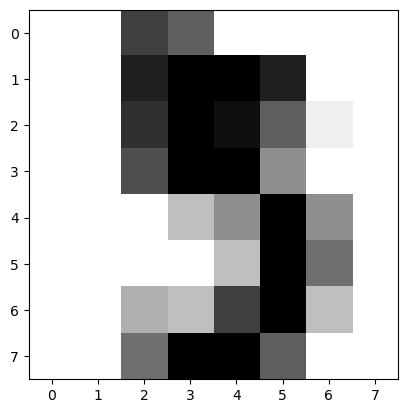

In [10]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[5],cmap='binary')
plt.show()

In [11]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


In [27]:
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

clf = svm.SVC(gamma=0.001)

X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=True)

In [28]:
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [29]:
predicted = clf.predict(X_test)

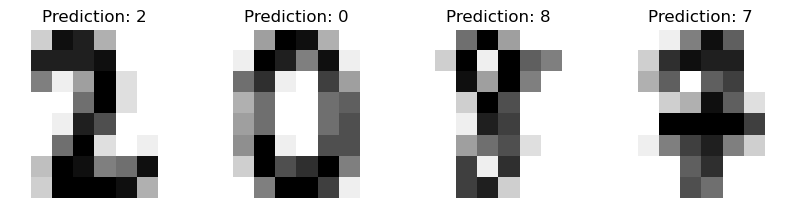

In [30]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Confusion matrix:
[[95  0  0  0  0  0  0  0  0  0]
 [ 0 84  0  0  0  0  0  0  0  0]
 [ 0  0 84  0  0  0  0  0  0  0]
 [ 0  0  0 92  0  0  0  0  0  0]
 [ 0  0  0  0 87  0  0  0  2  0]
 [ 0  0  0  0  0 90  1  0  0  2]
 [ 0  0  0  0  0  0 93  0  0  0]
 [ 0  0  0  0  0  0  0 82  0  1]
 [ 0  1  0  0  0  0  0  0 94  1]
 [ 0  0  0  0  0  0  0  1  0 89]]


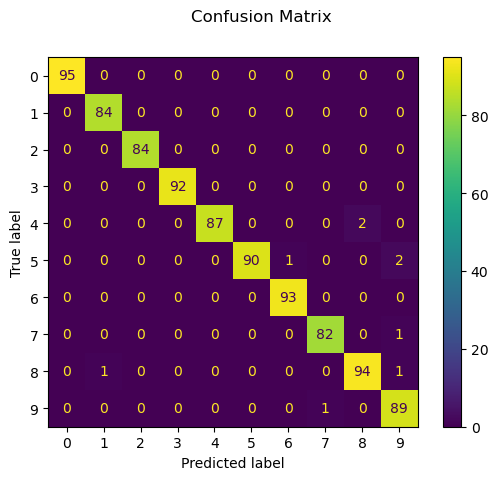

In [32]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")



In [33]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       0.99      1.00      0.99        84
           2       1.00      1.00      1.00        84
           3       1.00      1.00      1.00        92
           4       1.00      0.98      0.99        89
           5       1.00      0.97      0.98        93
           6       0.99      1.00      0.99        93
           7       0.99      0.99      0.99        83
           8       0.98      0.98      0.98        96
           9       0.96      0.99      0.97        90

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899


